# Time Series Basics With Python


In [2]:
import pandas as pd
import numpy as np

### Time Stamp Object

In [3]:
date1="6th aug 2001"
date2="7th sep 2003 3:00"
date1

'6th aug 2001'

In [4]:
display(pd.Timestamp(date1))
display(pd.Timestamp(date2))

Timestamp('2001-08-06 00:00:00')

Timestamp('2003-09-07 03:00:00')

### to_datetime() Function

In [5]:
s = pd.Series(['2023/1/6','2023/1/7','2023/1/7'])
s

0    2023/1/6
1    2023/1/7
2    2023/1/7
dtype: object

In [6]:
pd.to_datetime(s)

0   2023-01-06
1   2023-01-07
2   2023-01-07
dtype: datetime64[ns]

### Date Time Index
Array of Time Stamp object is called Datetime Index

In [7]:
index_obj=pd.DatetimeIndex([date1,date2])
display(index_obj)
display(index_obj[0])

DatetimeIndex(['2001-08-06 00:00:00', '2003-09-07 03:00:00'], dtype='datetime64[ns]', freq=None)

Timestamp('2001-08-06 00:00:00')

### Time Delta Object

The difference between 2 timestamp objects is called time delta object.

In [8]:
pd.Timestamp("6/8/2001")-pd.Timestamp("6/7/2001")

Timedelta('1 days 00:00:00')

Other way to create a time delta

In [9]:
d110=pd.Timedelta(days=1, hours=10, seconds=3)

In [10]:
pd.Timestamp("6/8/2001")

Timestamp('2001-06-08 00:00:00')

In [11]:
pd.Timestamp("6/8/2001")+d110

Timestamp('2001-06-09 10:00:03')

#### Date Range

Using Pandas

In [12]:
day1=pd.Timestamp("6th aug 2003")
day2=pd.Timestamp("30th aug 2003")
display(day1, day2)

Timestamp('2003-08-06 00:00:00')

Timestamp('2003-08-30 00:00:00')

In [13]:
pd.date_range(day1, day2)

DatetimeIndex(['2003-08-06', '2003-08-07', '2003-08-08', '2003-08-09',
               '2003-08-10', '2003-08-11', '2003-08-12', '2003-08-13',
               '2003-08-14', '2003-08-15', '2003-08-16', '2003-08-17',
               '2003-08-18', '2003-08-19', '2003-08-20', '2003-08-21',
               '2003-08-22', '2003-08-23', '2003-08-24', '2003-08-25',
               '2003-08-26', '2003-08-27', '2003-08-28', '2003-08-29',
               '2003-08-30'],
              dtype='datetime64[ns]', freq='D')

In [14]:
pd.date_range(day1, day2, freq='2D')

DatetimeIndex(['2003-08-06', '2003-08-08', '2003-08-10', '2003-08-12',
               '2003-08-14', '2003-08-16', '2003-08-18', '2003-08-20',
               '2003-08-22', '2003-08-24', '2003-08-26', '2003-08-28',
               '2003-08-30'],
              dtype='datetime64[ns]', freq='2D')

In [15]:
#custom time delta

pd.date_range(day1, day2, freq=pd.Timedelta(days=2, hours=2.5))

DatetimeIndex(['2003-08-06 00:00:00', '2003-08-08 02:30:00',
               '2003-08-10 05:00:00', '2003-08-12 07:30:00',
               '2003-08-14 10:00:00', '2003-08-16 12:30:00',
               '2003-08-18 15:00:00', '2003-08-20 17:30:00',
               '2003-08-22 20:00:00', '2003-08-24 22:30:00',
               '2003-08-27 01:00:00', '2003-08-29 03:30:00'],
              dtype='datetime64[ns]', freq='3030T')

In [21]:
# Buisness Days
pd.date_range(day1, day2, freq='B')

DatetimeIndex(['2003-08-06', '2003-08-07', '2003-08-08', '2003-08-11',
               '2003-08-12', '2003-08-13', '2003-08-14', '2003-08-15',
               '2003-08-18', '2003-08-19', '2003-08-20', '2003-08-21',
               '2003-08-22', '2003-08-25', '2003-08-26', '2003-08-27',
               '2003-08-28', '2003-08-29'],
              dtype='datetime64[ns]', freq='B')

In [23]:
#Year End
pd.date_range(day1, day2, freq='A')

DatetimeIndex([], dtype='datetime64[ns]', freq='A-DEC')

In [25]:
day1=pd.Timestamp("1th aug 2003")
day2=pd.Timestamp("30th aug 2003")
pd.date_range(day1, day2, freq='MS')

DatetimeIndex(['2003-08-01'], dtype='datetime64[ns]', freq='MS')

### Example with a dataset

In [17]:
deliveries=pd.read_csv("deliveries.csv")
deliveries.head()

,order_date,delivery_date
0,5/24/98,2/5/99
1,4/22/92,3/6/98
2,2/10/91,8/26/92
3,7/21/92,11/20/97
4,9/2/93,6/10/98


In [18]:
deliveries['delivery_date']=pd.to_datetime(deliveries['delivery_date'])
deliveries['order_date']=pd.to_datetime(deliveries['order_date'])

/tmp/ipykernel_7421/217333818.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  deliveries['delivery_date']=pd.to_datetime(deliveries['delivery_date'])
/tmp/ipykernel_7421/217333818.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  deliveries['order_date']=pd.to_datetime(deliveries['order_date'])


In [19]:
deliveries['delivery_time_period']=deliveries.delivery_date-deliveries.order_date

In [20]:
deliveries.head()

,order_date,delivery_date,delivery_time_period
0,1998-05-24,1999-02-05,257 days
1,1992-04-22,1998-03-06,2144 days
2,1991-02-10,1992-08-26,563 days
3,1992-07-21,1997-11-20,1948 days
4,1993-09-02,1998-06-10,1742 days


## Time Series Analysis

In [27]:
google=pd.read_csv("google.csv")
google.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
3,2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276


In [28]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4471 entries, 0 to 4470
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4471 non-null   object 
 1   Open       4471 non-null   float64
 2   High       4471 non-null   float64
 3   Low        4471 non-null   float64
 4   Close      4471 non-null   float64
 5   Adj Close  4471 non-null   float64
 6   Volume     4471 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 244.6+ KB


In [29]:
google['Date']=pd.to_datetime(google.Date)

In [30]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4471 entries, 0 to 4470
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4471 non-null   datetime64[ns]
 1   Open       4471 non-null   float64       
 2   High       4471 non-null   float64       
 3   Low        4471 non-null   float64       
 4   Close      4471 non-null   float64       
 5   Adj Close  4471 non-null   float64       
 6   Volume     4471 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 244.6 KB


In [31]:
google.set_index('Date', inplace=True)

In [32]:
google.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276


#### Indexing and Partial Indexing

In [34]:
google.loc['2004-08-24']

Open         5.541230e+01
High         5.559163e+01
Low          5.159162e+01
Close        5.223920e+01
Adj Close    5.223920e+01
Volume       1.531981e+07
Name: 2004-08-24 00:00:00, dtype: float64

In [35]:
google.loc['2004-08']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276
2004-08-26,52.279045,53.773445,52.134586,53.753517,53.753517,7128620
2004-08-27,53.848164,54.107193,52.647663,52.876804,52.876804,6241307
2004-08-30,52.443428,52.548038,50.814533,50.814533,50.814533,5221498
2004-08-31,50.958992,51.661362,50.889256,50.993862,50.993862,4941252


In [36]:
google.loc['2004']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276
...,...,...,...,...,...,...
2004-12-27,94.221832,96.289085,94.196930,95.596680,95.596680,12253959
2004-12-28,95.696304,96.413620,95.148361,96.020096,96.020096,8322679
2004-12-29,95.531921,96.398674,95.531921,96.089828,96.089828,5376276


### Preparing the data

In [44]:
google['Month']=google.index.month_name()
google['Month']=google.index.day_name()
google['Month']=google.index.quarter

google

,Open,High,Low,Close,Adj Close,Volume,Month
Date,,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361,3
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874,3
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897,3
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808,3
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276,3
...,...,...,...,...,...,...,...
2022-05-16,2307.679932,2332.149902,2286.699951,2295.850098,2295.850098,1164100,2
2022-05-17,2344.550049,2344.550049,2306.750000,2334.030029,2334.030029,1078800,2
2022-05-18,2304.750000,2313.913086,2242.840088,2248.020020,2248.020020,1399100,2


In [51]:
google.loc["2004":"2005"]

,Open,High,Low,Close,Adj Close,Volume,Month
Date,,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361,3
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874,3
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897,3
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808,3
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276,3
...,...,...,...,...,...,...,...
2005-12-23,215.268127,215.442474,213.589417,214.660400,214.660400,9224647,4
2005-12-27,215.123657,215.123657,210.590652,211.527145,211.527145,13455847,4
2005-12-28,211.377701,213.091278,209.843460,212.548325,212.548325,14289159,4


### Challenge -> Fetch info for a particular date every year 

- Limitation of timedelta


In [52]:
google.index

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01',
               ...
               '2022-05-09', '2022-05-10', '2022-05-11', '2022-05-12',
               '2022-05-13', '2022-05-16', '2022-05-17', '2022-05-18',
               '2022-05-19', '2022-05-20'],
              dtype='datetime64[ns]', name='Date', length=4471, freq=None)

In [53]:
pd.date_range(start="2004-08-19", end="2022-08-19", freq=pd.Timedelta(days=365))

DatetimeIndex(['2004-08-19', '2005-08-19', '2006-08-19', '2007-08-19',
               '2008-08-18', '2009-08-18', '2010-08-18', '2011-08-18',
               '2012-08-17', '2013-08-17', '2014-08-17', '2015-08-17',
               '2016-08-16', '2017-08-16', '2018-08-16', '2019-08-16',
               '2020-08-15', '2021-08-15', '2022-08-15'],
              dtype='datetime64[ns]', freq='365D')

The problem with the above approach is we cannot detect the leap year.

In [54]:
pd.date_range(start="2004-08-19", end="2022-08-19", freq=pd.Timedelta(years=1))

ValueError: cannot construct a Timedelta from the passed arguments, allowed keywords are [weeks, days, hours, minutes, seconds, milliseconds, microseconds, nanoseconds]

`And Time delta module does not support year key word !!!`

To solve this we have to use date_offset !!

In [55]:
pd.date_range(start="2004-08-19", end="2022-08-19", freq=pd.DateOffset(years=1))

DatetimeIndex(['2004-08-19', '2005-08-19', '2006-08-19', '2007-08-19',
               '2008-08-19', '2009-08-19', '2010-08-19', '2011-08-19',
               '2012-08-19', '2013-08-19', '2014-08-19', '2015-08-19',
               '2016-08-19', '2017-08-19', '2018-08-19', '2019-08-19',
               '2020-08-19', '2021-08-19', '2022-08-19'],
              dtype='datetime64[ns]', freq='<DateOffset: years=1>')

### Plotting

<Axes: xlabel='Date'>

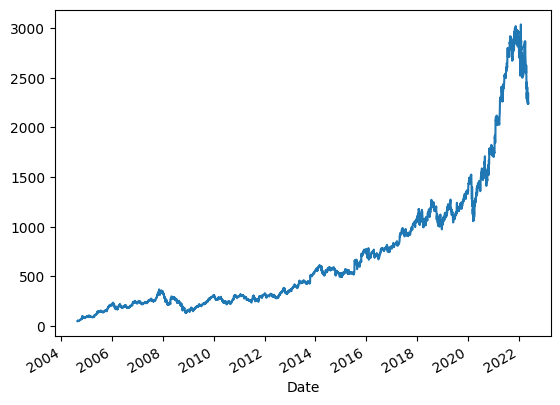

In [57]:
google['Open'].plot()

<Axes: xlabel='Date'>

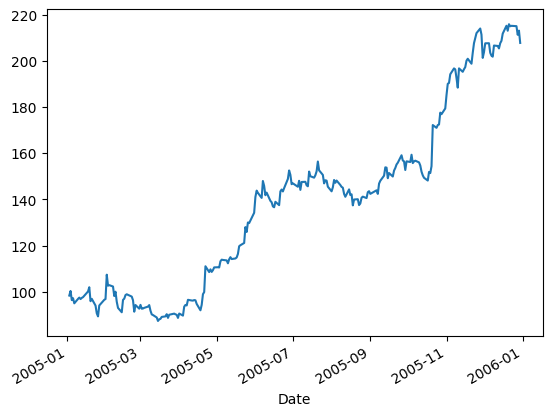

In [62]:
google.loc['2005']['Open'].plot()

<Axes: xlabel='Date'>

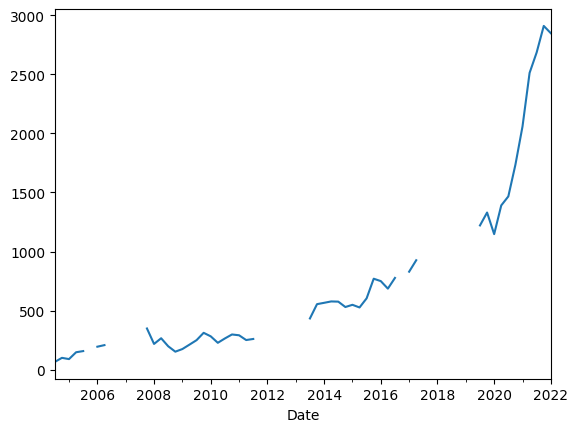

In [69]:
google.asfreq("Q")['Open'].plot()